## Importing Libraries

In [81]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
import joblib
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from collections import Counter

## Load the dataset

In [3]:
df = pd.read_csv('dataset_B_05_2020.csv')

## Information about the dataset

In [4]:
df.head(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.tail(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


### Looking for missing values

In [8]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

Class Distribution:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64

Class Distribution (%):
status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64


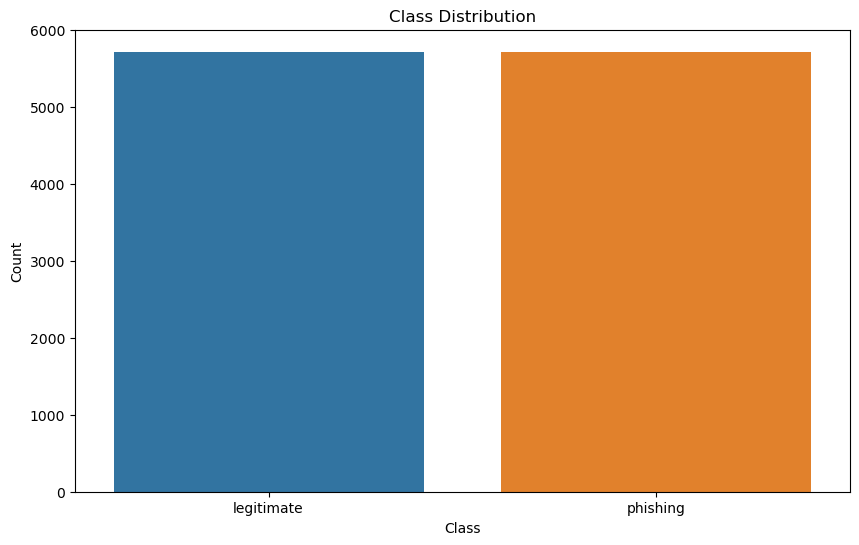


Imbalance Ratio: 1.00


In [9]:
# Check class distribution
target_counts = df['status'].value_counts()
target_percentages = df['status'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(target_counts)
print("\nClass Distribution (%):")
print(target_percentages)

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate imbalance ratio
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

## Separate feature and target 

In [10]:
# Assuming the last column is the target variable
x = df.drop(['status', 'url'], axis = 1)
y = df['status']

In [11]:
print(x)

       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_or  nb_eq  ...  empty_title  domain_in_title  \
0        

In [12]:
print(y)

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object


In [13]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
# def analyze_class_distribution(y, title):
#     if isinstance(y, pd.Series):
#         class_counts = y.value_counts()
#     else:
#         class_counts = pd.Series(Counter(y))
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=class_counts.index, y=class_counts.values)
#     plt.title(title)
#     plt.xlabel('Class')
#     plt.ylabel('Count')
#     for i, v in enumerate(class_counts.values):
#         plt.text(i, v, str(v), ha='center', va='bottom')
#     plt.show()

#     print(f"\n{title}")
#     print(class_counts)
#     print(f"Class balance ratio: {min(class_counts) / max(class_counts):.2f}")

In [15]:
# # Analyze original data
# analyze_class_distribution(y, "Original Class Distribution")

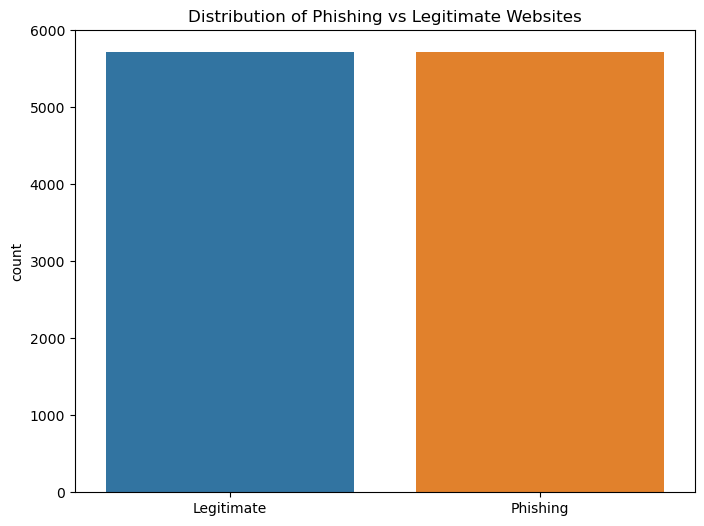

In [16]:
# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Phishing vs Legitimate Websites')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.show()

In [17]:
# # Select numeric columns for correlation analysis
# numeric_columns = x.select_dtypes(include=[np.number]).columns

In [18]:
# # Correlation heatmap (only for numeric features)
# plt.figure(figsize=(20, 16))
# sns.heatmap(x[numeric_columns].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Feature Correlation Heatmap (Numeric Features Only)')
# plt.show()

In [19]:
# 1. Correlation Analysis
correlation_matrix = x.corr()

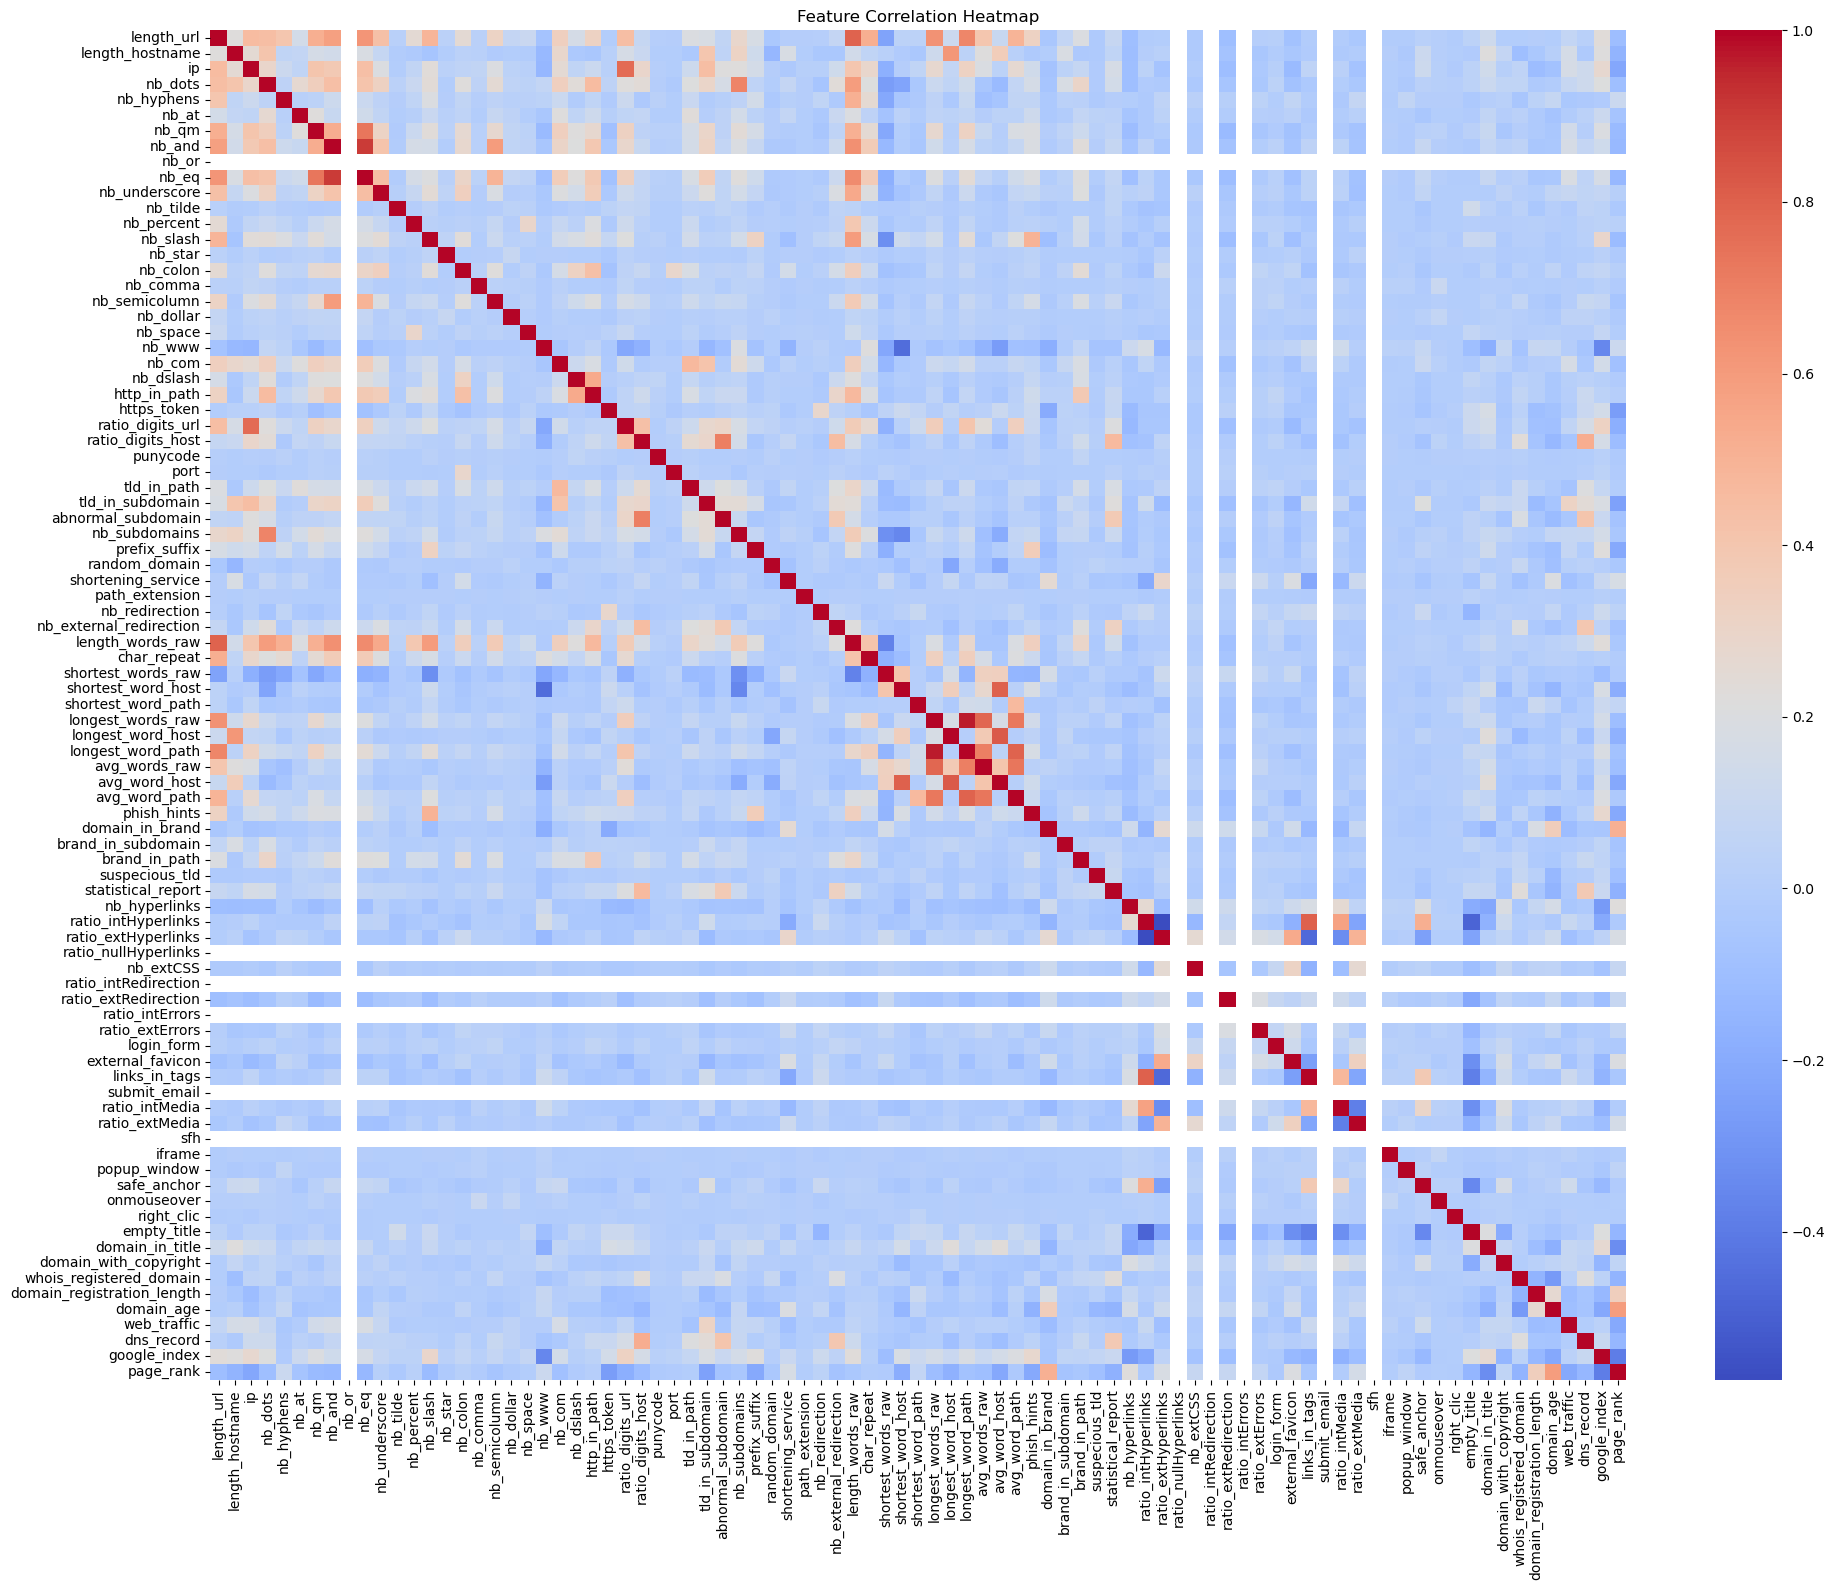

In [20]:
# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## Feature Selection

In [21]:
# Identify highly correlated features
high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

In [22]:
print("Highly correlated feature pairs:")
for pair in high_corr_features:
    print(pair)

Highly correlated feature pairs:
('nb_and', 'nb_eq')
('shortest_word_host', 'avg_word_host')
('longest_words_raw', 'longest_word_path')
('longest_word_host', 'avg_word_host')


In [23]:
# 2. Feature Importance from Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x, y)

RandomForestClassifier(random_state=42)

In [24]:
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

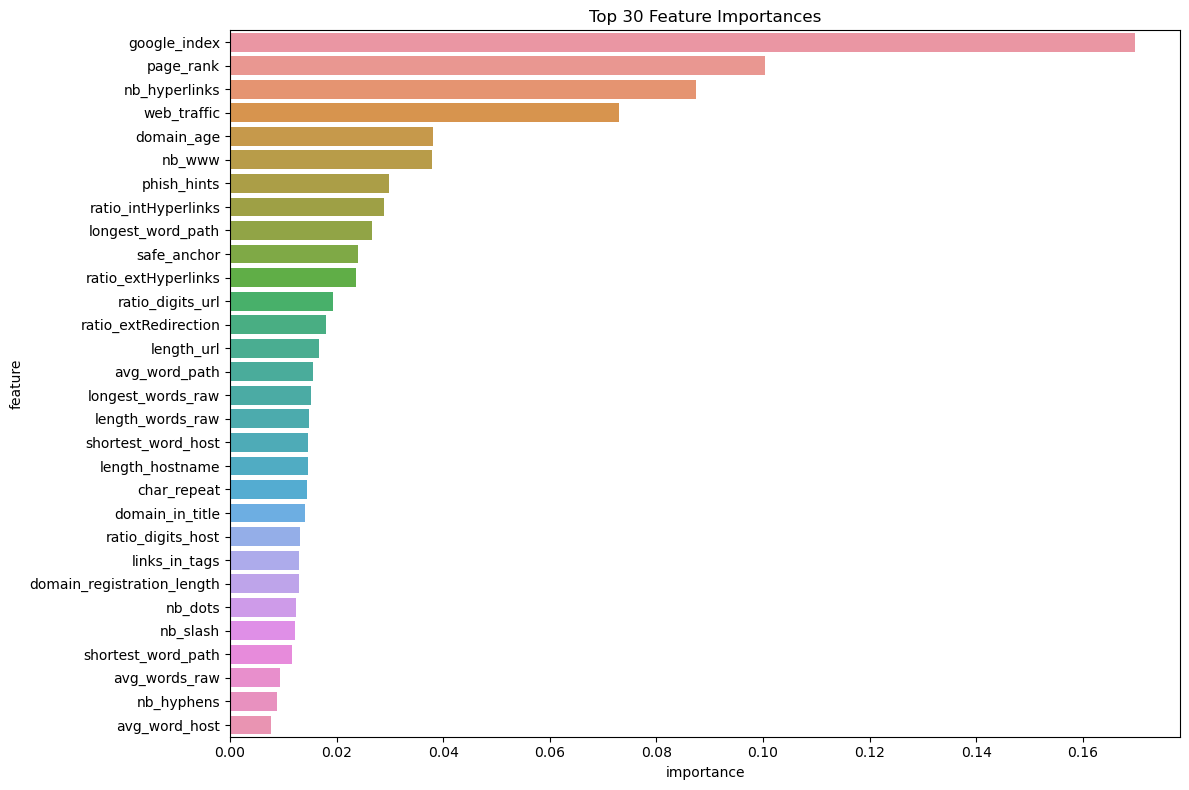

In [25]:
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 30 Feature Importances')
plt.tight_layout()
plt.show()

In [26]:
print("\nTop 30 important features from Random Forest:")
print(feature_importance.head(30))


Top 30 important features from Random Forest:
                       feature  importance
85                google_index    0.169744
86                   page_rank    0.100367
56               nb_hyperlinks    0.087397
83                 web_traffic    0.073052
82                  domain_age    0.038080
20                      nb_www    0.037966
50                 phish_hints    0.029911
57         ratio_intHyperlinks    0.028965
46           longest_word_path    0.026592
74                 safe_anchor    0.023949
58         ratio_extHyperlinks    0.023629
25            ratio_digits_url    0.019259
62        ratio_extRedirection    0.018042
0                   length_url    0.016660
49               avg_word_path    0.015603
44           longest_words_raw    0.015139
39            length_words_raw    0.014894
42          shortest_word_host    0.014563
1              length_hostname    0.014563
40                 char_repeat    0.014384
78             domain_in_title    0.014140
26     

In [27]:
# 3. Select K Best Features
k_best = SelectKBest(score_func=f_classif, k=30)
k_best.fit(x, y)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=30)

In [28]:
selected_features = x.columns[k_best.get_support()]


In [29]:
print("\nTop 30 features selected by SelectKBest:")
print(selected_features)


Top 30 features selected by SelectKBest:
Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_eq',
       'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'prefix_suffix', 'length_words_raw',
       'shortest_word_host', 'longest_words_raw', 'longest_word_path',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'links_in_tags', 'ratio_intMedia', 'safe_anchor',
       'empty_title', 'domain_in_title', 'domain_with_copyright', 'domain_age',
       'google_index', 'page_rank'],
      dtype='object')


In [30]:
# Combine the results
rf_features = set(feature_importance['feature'][:30])
kb_features = set(selected_features)
final_features = rf_features.union(kb_features)

In [31]:
print("\nFinal selected features:")
print(final_features)
print(f"\nTotal number of selected features: {len(final_features)}")


Final selected features:
{'tld_in_subdomain', 'ratio_extRedirection', 'domain_in_title', 'avg_word_path', 'length_words_raw', 'ratio_digits_url', 'prefix_suffix', 'ip', 'links_in_tags', 'ratio_intHyperlinks', 'empty_title', 'nb_slash', 'safe_anchor', 'ratio_extHyperlinks', 'avg_word_host', 'google_index', 'length_url', 'shortest_word_host', 'phish_hints', 'domain_with_copyright', 'nb_hyperlinks', 'nb_hyphens', 'page_rank', 'shortest_word_path', 'nb_www', 'avg_words_raw', 'nb_qm', 'nb_dots', 'longest_words_raw', 'domain_registration_length', 'ratio_digits_host', 'nb_eq', 'longest_word_path', 'length_hostname', 'domain_age', 'char_repeat', 'ratio_intMedia', 'web_traffic'}

Total number of selected features: 38


In [32]:
# If more than 30 features are selected, prioritize based on Random Forest importance
if len(final_features) > 30:
    final_features = set(feature_importance['feature'][:30])

In [33]:
print("\nFinal 30 selected features:")
print(final_features)


Final 30 selected features:
{'ratio_extRedirection', 'domain_in_title', 'avg_word_path', 'length_words_raw', 'ratio_digits_url', 'links_in_tags', 'ratio_intHyperlinks', 'nb_slash', 'safe_anchor', 'ratio_extHyperlinks', 'avg_word_host', 'google_index', 'length_url', 'shortest_word_host', 'phish_hints', 'nb_hyperlinks', 'nb_hyphens', 'page_rank', 'shortest_word_path', 'nb_www', 'avg_words_raw', 'nb_dots', 'longest_words_raw', 'domain_registration_length', 'ratio_digits_host', 'longest_word_path', 'length_hostname', 'domain_age', 'char_repeat', 'web_traffic'}


## Analyze Selected Features

In [52]:
# Assuming 'final_features' is your set of selected features
# and 'df' is your original DataFrame
selected_df = df[list(final_features)]
# Correlation matrix of selected features
corr_matrix = selected_df.corr()


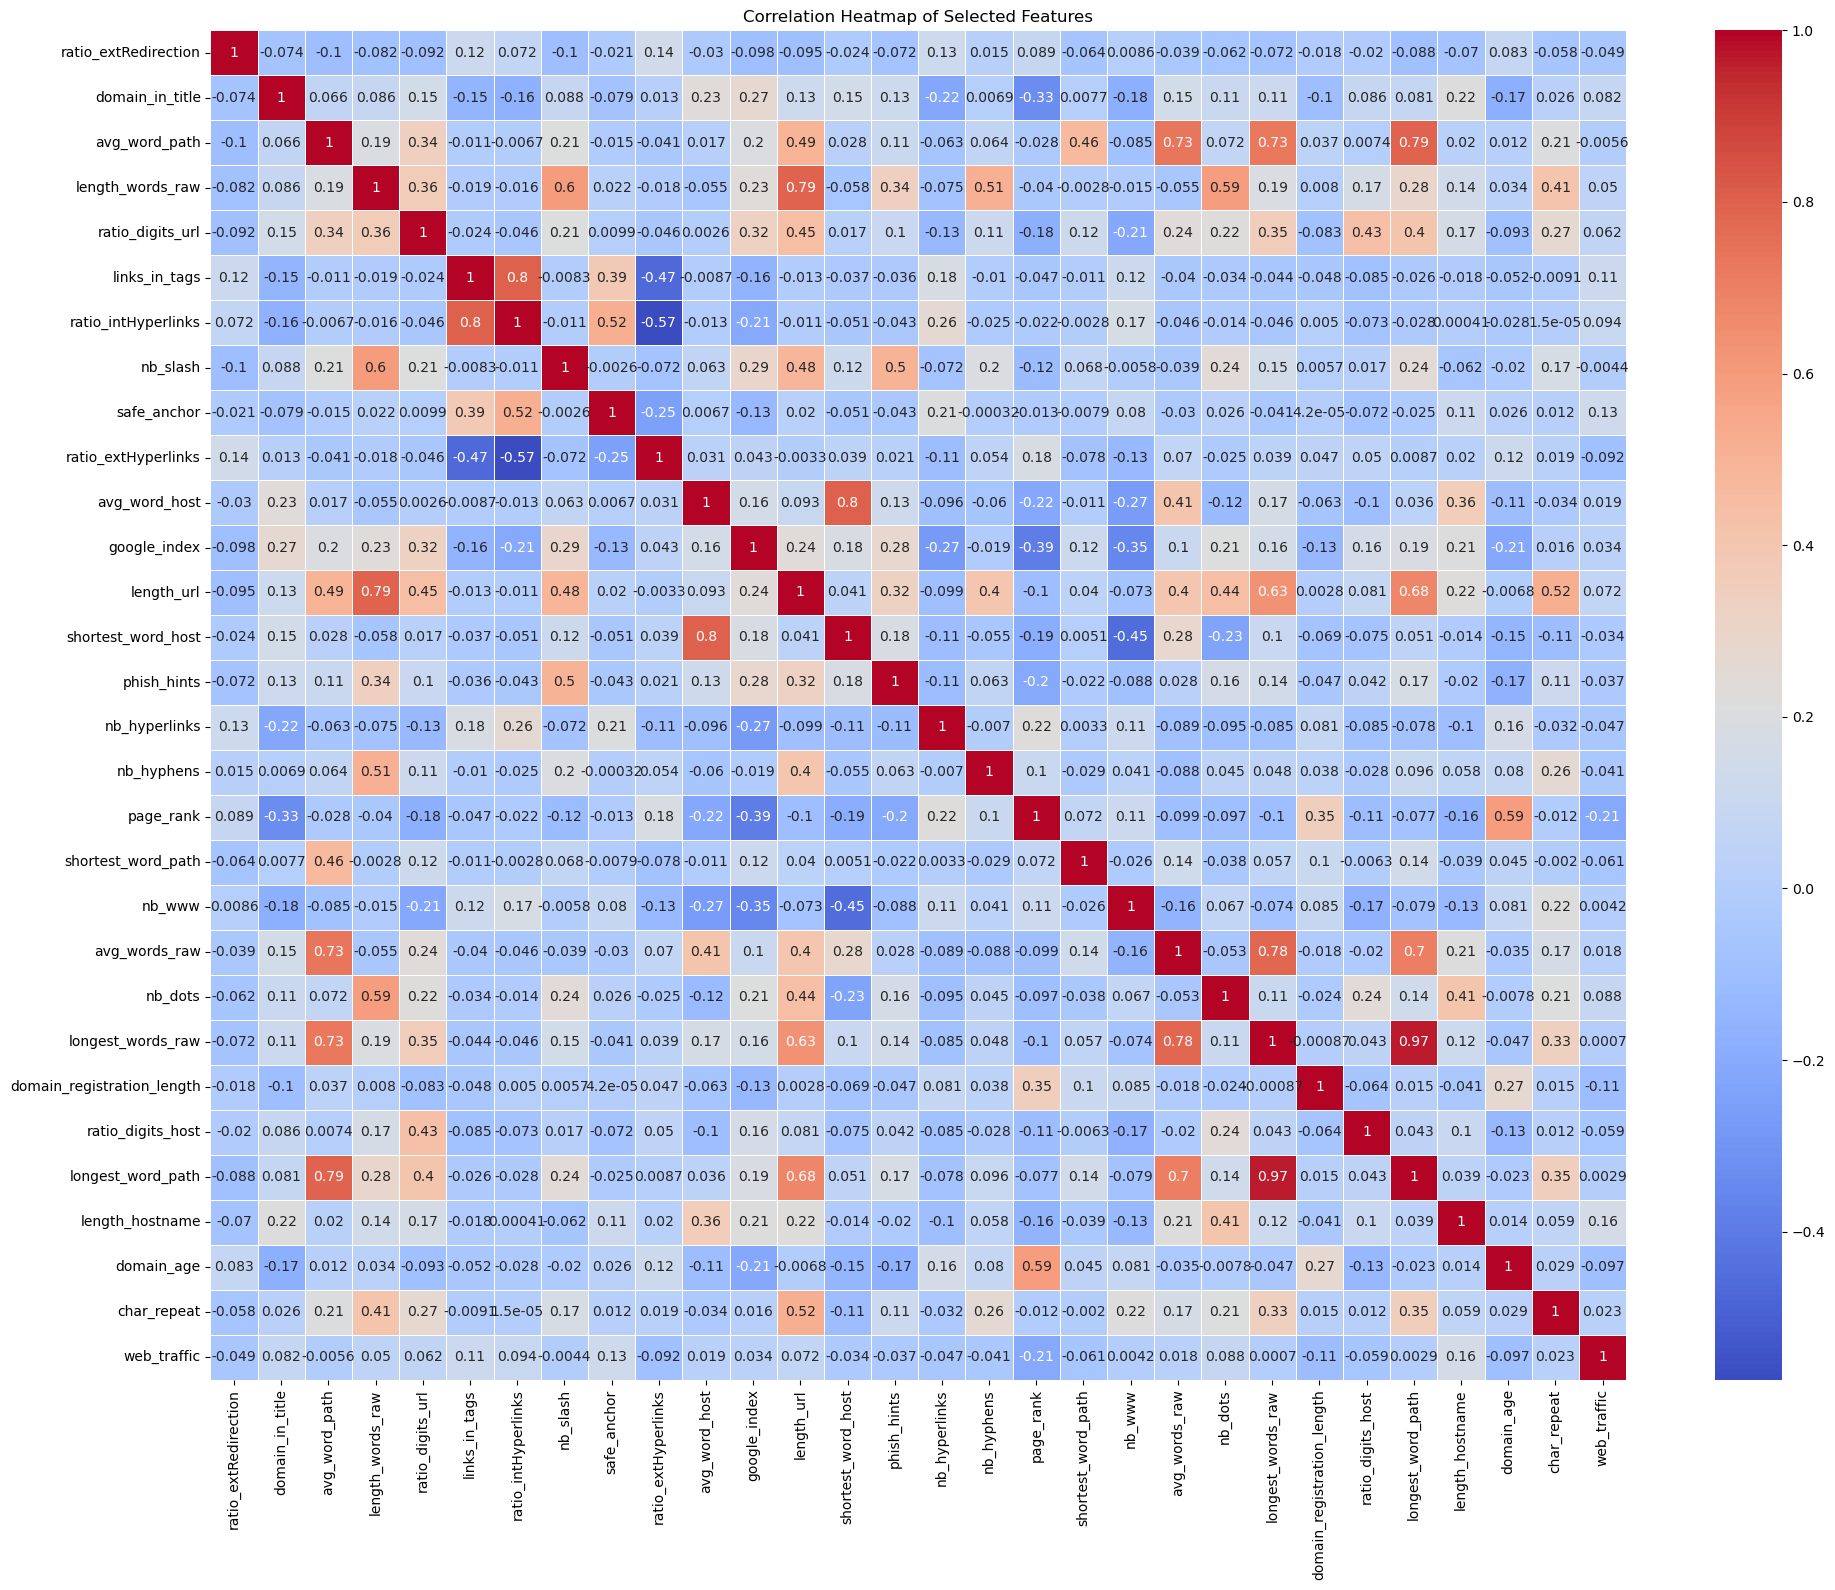

In [53]:
# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

In [54]:
# Print statistics of selected features
print(selected_df.describe())

       ratio_extRedirection  domain_in_title  avg_word_path  length_words_raw  \
count          11430.000000     11430.000000   11430.000000      11430.000000   
mean               0.158926         0.775853       5.092425          6.232808   
std                0.266437         0.417038       7.147050          5.572355   
min                0.000000         0.000000       0.000000          1.000000   
25%                0.000000         1.000000       0.000000          2.000000   
50%                0.000000         1.000000       4.857143          5.000000   
75%                0.230769         1.000000       6.714286          8.000000   
max                2.000000         1.000000     250.000000        106.000000   

       ratio_digits_url  links_in_tags  ratio_intHyperlinks      nb_slash  \
count      11430.000000   11430.000000         11430.000000  11430.000000   
mean           0.053137      51.978211             0.602457      4.289589   
std            0.089363      41.523144 

In [55]:
 # Check for any remaining high correlations
high_corr = np.where(np.abs(corr_matrix) > 0.8)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                for x, y in zip(*high_corr) if x != y and x < y]
print("Remaining highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(pair)

Remaining highly correlated feature pairs:
('avg_word_host', 'shortest_word_host')
('longest_words_raw', 'longest_word_path')


## Model Training

In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
x = df[selected_features]

In [36]:
# Assume X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# Define models
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [38]:
# Function to evaluate model
def evaluate_model(model, x, y):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, x, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

In [39]:
# Evaluate each model
results = {}
for name, model in models.items():
    mean_score, std_score = evaluate_model(model, X_train, y_train)
    results[name] = (mean_score, std_score)
    print(f'{name} - Mean accuracy: {mean_score:.3f} (+/- {std_score * 2:.3f})')

Gaussian Naive Bayes - Mean accuracy: 0.808 (+/- 0.017)
AdaBoost - Mean accuracy: 0.945 (+/- 0.009)
ExtraTrees - Mean accuracy: 0.960 (+/- 0.003)
Gradient Boosting - Mean accuracy: 0.953 (+/- 0.008)
XGBoost - Mean accuracy: 0.964 (+/- 0.004)
[LightGBM] [Info] Number of positive: 3668, number of negative: 3647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2834
[LightGBM] [Info] Number of data points in the train set: 7315, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501435 -> initscore=0.005742
[LightGBM] [Info] Start training from score 0.005742
[LightGBM] [Info] Number of positive: 3669, number of negative: 3646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true

In [40]:
# Find the best model
best_model_name = max(results, key=lambda k: results[k][0])
best_model = models[best_model_name]

In [41]:
print(f"\nBest model: {best_model_name}")


Best model: LightGBM


In [42]:
# Train the best model on the entire training set
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4586, number of negative: 4558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2906
[LightGBM] [Info] Number of data points in the train set: 9144, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501531 -> initscore=0.006124
[LightGBM] [Info] Start training from score 0.006124


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LGBMClassifier(random_state=42))])

In [43]:
# Evaluate on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest set accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test set accuracy: 0.966

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score


In [57]:
# Define the parameter space
param_dist = {
    
    'num_leaves': [31, 127, 255],
    'max_depth': [-1, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [58]:
 # Create the LightGBM model
lgbm = LGBMClassifier(random_state=42)

In [59]:
 # Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring=make_scorer(f1_score, average='weighted'),
    random_state=42,
    n_jobs=-1
   )

In [61]:
# Fit the random search
random_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4586, number of negative: 4558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 9144, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501531 -> initscore=0.006124
[LightGBM] [Info] Start training from score 0.006124


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10, 15, 20],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 127, 255],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=weighted))

In [62]:
 # Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best parameters: {'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 5, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best cross-validation score: 0.9675190887709508


In [63]:
# Use the best model to make predictions on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nTest set performance:")
print(classification_report(y_test, y_pred))


Test set performance:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [64]:
 # Save the best model
joblib.dump(best_model, 'optimized_lgbm_model.joblib')
print("Optimized model saved successfully.")

Optimized model saved successfully.


# SHAP Analysis for LightGBM Model

In [65]:
import shap

# Load your best model
best_model = joblib.load('optimized_lgbm_model.joblib')

   # Create a SHAP explainer
explainer = shap.TreeExplainer(best_model)

   # Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

ModuleNotFoundError: No module named 'shap'

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'